**Name-Surname:** Gianpietro Nicoletti <br>
**ID**: 2053042

1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [15]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
BOLD = "\033[1m"
END = "\033[0m"

In [17]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [18]:
df = pd.read_csv("data/data_000637.txt", nrows=10500)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
10495,1,1,97,3869200272,867,24
10496,1,1,98,3869200272,865,7
10497,1,0,56,3869200272,865,0
10498,1,1,139,3869200272,871,0


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [19]:
bx_in_orbit = df["BX_COUNTER"].max() #every each orbit_in_bx we have +1 orbit,
                                     #Taking the max is only an aproximation, but this is for sure a lower bound

print(BOLD,"Inside a orbit there are at least :",END,bx_in_orbit," bx")



 Inside a orbit there are at least :  3563  bx


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [20]:
orbit_ns = bx_in_orbit*25 #number of ns in a orbit

#adding the additional column:
#TCD = 25/30ns, BC = 25ns, ORBIT = x*25ns
#nanoseconds = TCT*(25/30) + BC*25 + ORBIT*x*25

df["ns_COUNT"] = df["TDC_MEAS"]*(25/30) + df["BX_COUNTER"]*25 + df["ORBIT_CNT"]*orbit_ns

print(BOLD,"The dataframe with the additional row is:",END)

df


 The dataframe with the additional row is: 


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ns_COUNT
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
10495,1,1,97,3869200272,867,24,3.446490e+14
10496,1,1,98,3869200272,865,7,3.446490e+14
10497,1,0,56,3869200272,865,0,3.446490e+14
10498,1,1,139,3869200272,871,0,3.446490e+14


In [21]:
values = df["ns_COUNT"].values #extracting the ns from the dataframe

time = pd.to_timedelta(values) #series of timedelta object

df["Time"] = time

print(BOLD,"TDataframe with a serie of timedelta:",END)

df

 TDataframe with a serie of timedelta: 


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ns_COUNT,Time
0,1,0,123,3869200167,2374,26,3.446490e+14,3 days 23:44:09.004934896
1,1,0,124,3869200167,2374,27,3.446490e+14,3 days 23:44:09.004934897
2,1,0,63,3869200167,2553,28,3.446490e+14,3 days 23:44:09.004939373
3,1,0,64,3869200167,2558,19,3.446490e+14,3 days 23:44:09.004939490
4,1,0,64,3869200167,2760,25,3.446490e+14,3 days 23:44:09.004944545
...,...,...,...,...,...,...,...,...
10495,1,1,97,3869200272,867,24,3.446490e+14,3 days 23:44:09.014250095
10496,1,1,98,3869200272,865,7,3.446490e+14,3 days 23:44:09.014250030
10497,1,0,56,3869200272,865,0,3.446490e+14,3 days 23:44:09.014250025
10498,1,1,139,3869200272,871,0,3.446490e+14,3 days 23:44:09.014250175


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [24]:
#Reading the entire dataset 
df = pd.read_csv("data/data_000637.txt")

#adding the additional column as before
df["Time"] = pd.to_timedelta(df["TDC_MEAS"]*(25/30) + df["BX_COUNTER"]*25 + df["ORBIT_CNT"]*orbit_ns)

#saving the initial time and the last time
start = df["Time"] .head(1)
end = df["Time"] .tail(1)

#difference of the time = duration of the transimition
delta = end.values[0] - start.values[0]

print(BOLD,"\n Duration of the data taking",END, pd.Timedelta(delta, unit='ns'))

 
 Duration of the data taking  0 days 00:00:00.980140994


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [25]:
#counting the row for each channel -> the other columns will have the same value insie (= count of rows)
#so i picked one random column and i order the dataframe according to it (in descending order)
df_TMP = df.groupby("TDC_CHANNEL").count().sort_values("Time",ascending=False)

print(BOLD,"The top 3 noisy channel are:",END)

#extracting the 3 channels with most count
df_TMP.head(3).index.values


 The top 3 noisy channel are: 


array([139,  64,  63])

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [26]:
#counting the rows for a specific ORBIT and saving the number of rows of the obtained dataframe
#i.e. the number of non-empty orbits
num_orbits=len(df.groupby("ORBIT_CNT").count())

num_orbits

11001

7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [29]:
#same as before but i consider only the channels with index = 139
num_unique = len(df[df["TDC_CHANNEL"]==139].groupby("ORBIT_CNT").count())

print(BOLD,"Number of unique orbits from channel 139:",END,num_unique)

 Number of unique orbits from channel 139:  10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [31]:
fpga = []#list that contains the dataframes for each fpga index
 
group = df.groupby(["FPGA","TDC_CHANNEL"]).count()#multindex datafram that alreary count the number of rows
                                                  #for that specific channel divided by the index of the fpga


i=0#keeping track of the number of the current iteration in order to read from the list the element 

for index1 in group.index[0]:#for each different first index(=index of the fpga)
      
    fpga.append(group.loc[index1])#extract the rows with that index
    fpga[i]["COUNT"]=fpga[i]["ORBIT_CNT"].values #adding a new row with the count (= walues in one random column,
                                                                                  #  as before)
        
    fpga[i]= fpga[i].loc[:,["COUNT"]] #slicing the dafaframe (=removing all the columns except count)
    i+=1
    

print(BOLD,"The dataframes for each fpga: ",END)

for i in range(len(fpga)):
   
    print(BOLD,"\n\nFpga index: "+str(i),"\n",END,"\n",fpga[i])


 The dataframes for each fpga:  
 

Fpga index: 0 
  
              COUNT
TDC_CHANNEL       
1             1215
2             1602
3             1493
4             2352
5             1432
...            ...
129              2
130             33
137             32
138             34
139          75617

[124 rows x 1 columns]
 

Fpga index: 1 
  
              COUNT
TDC_CHANNEL       
1            28438
2            32669
3            21970
4            26403
5            15003
...            ...
129             35
130             38
137             36
138             36
139          32442

[132 rows x 1 columns]


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

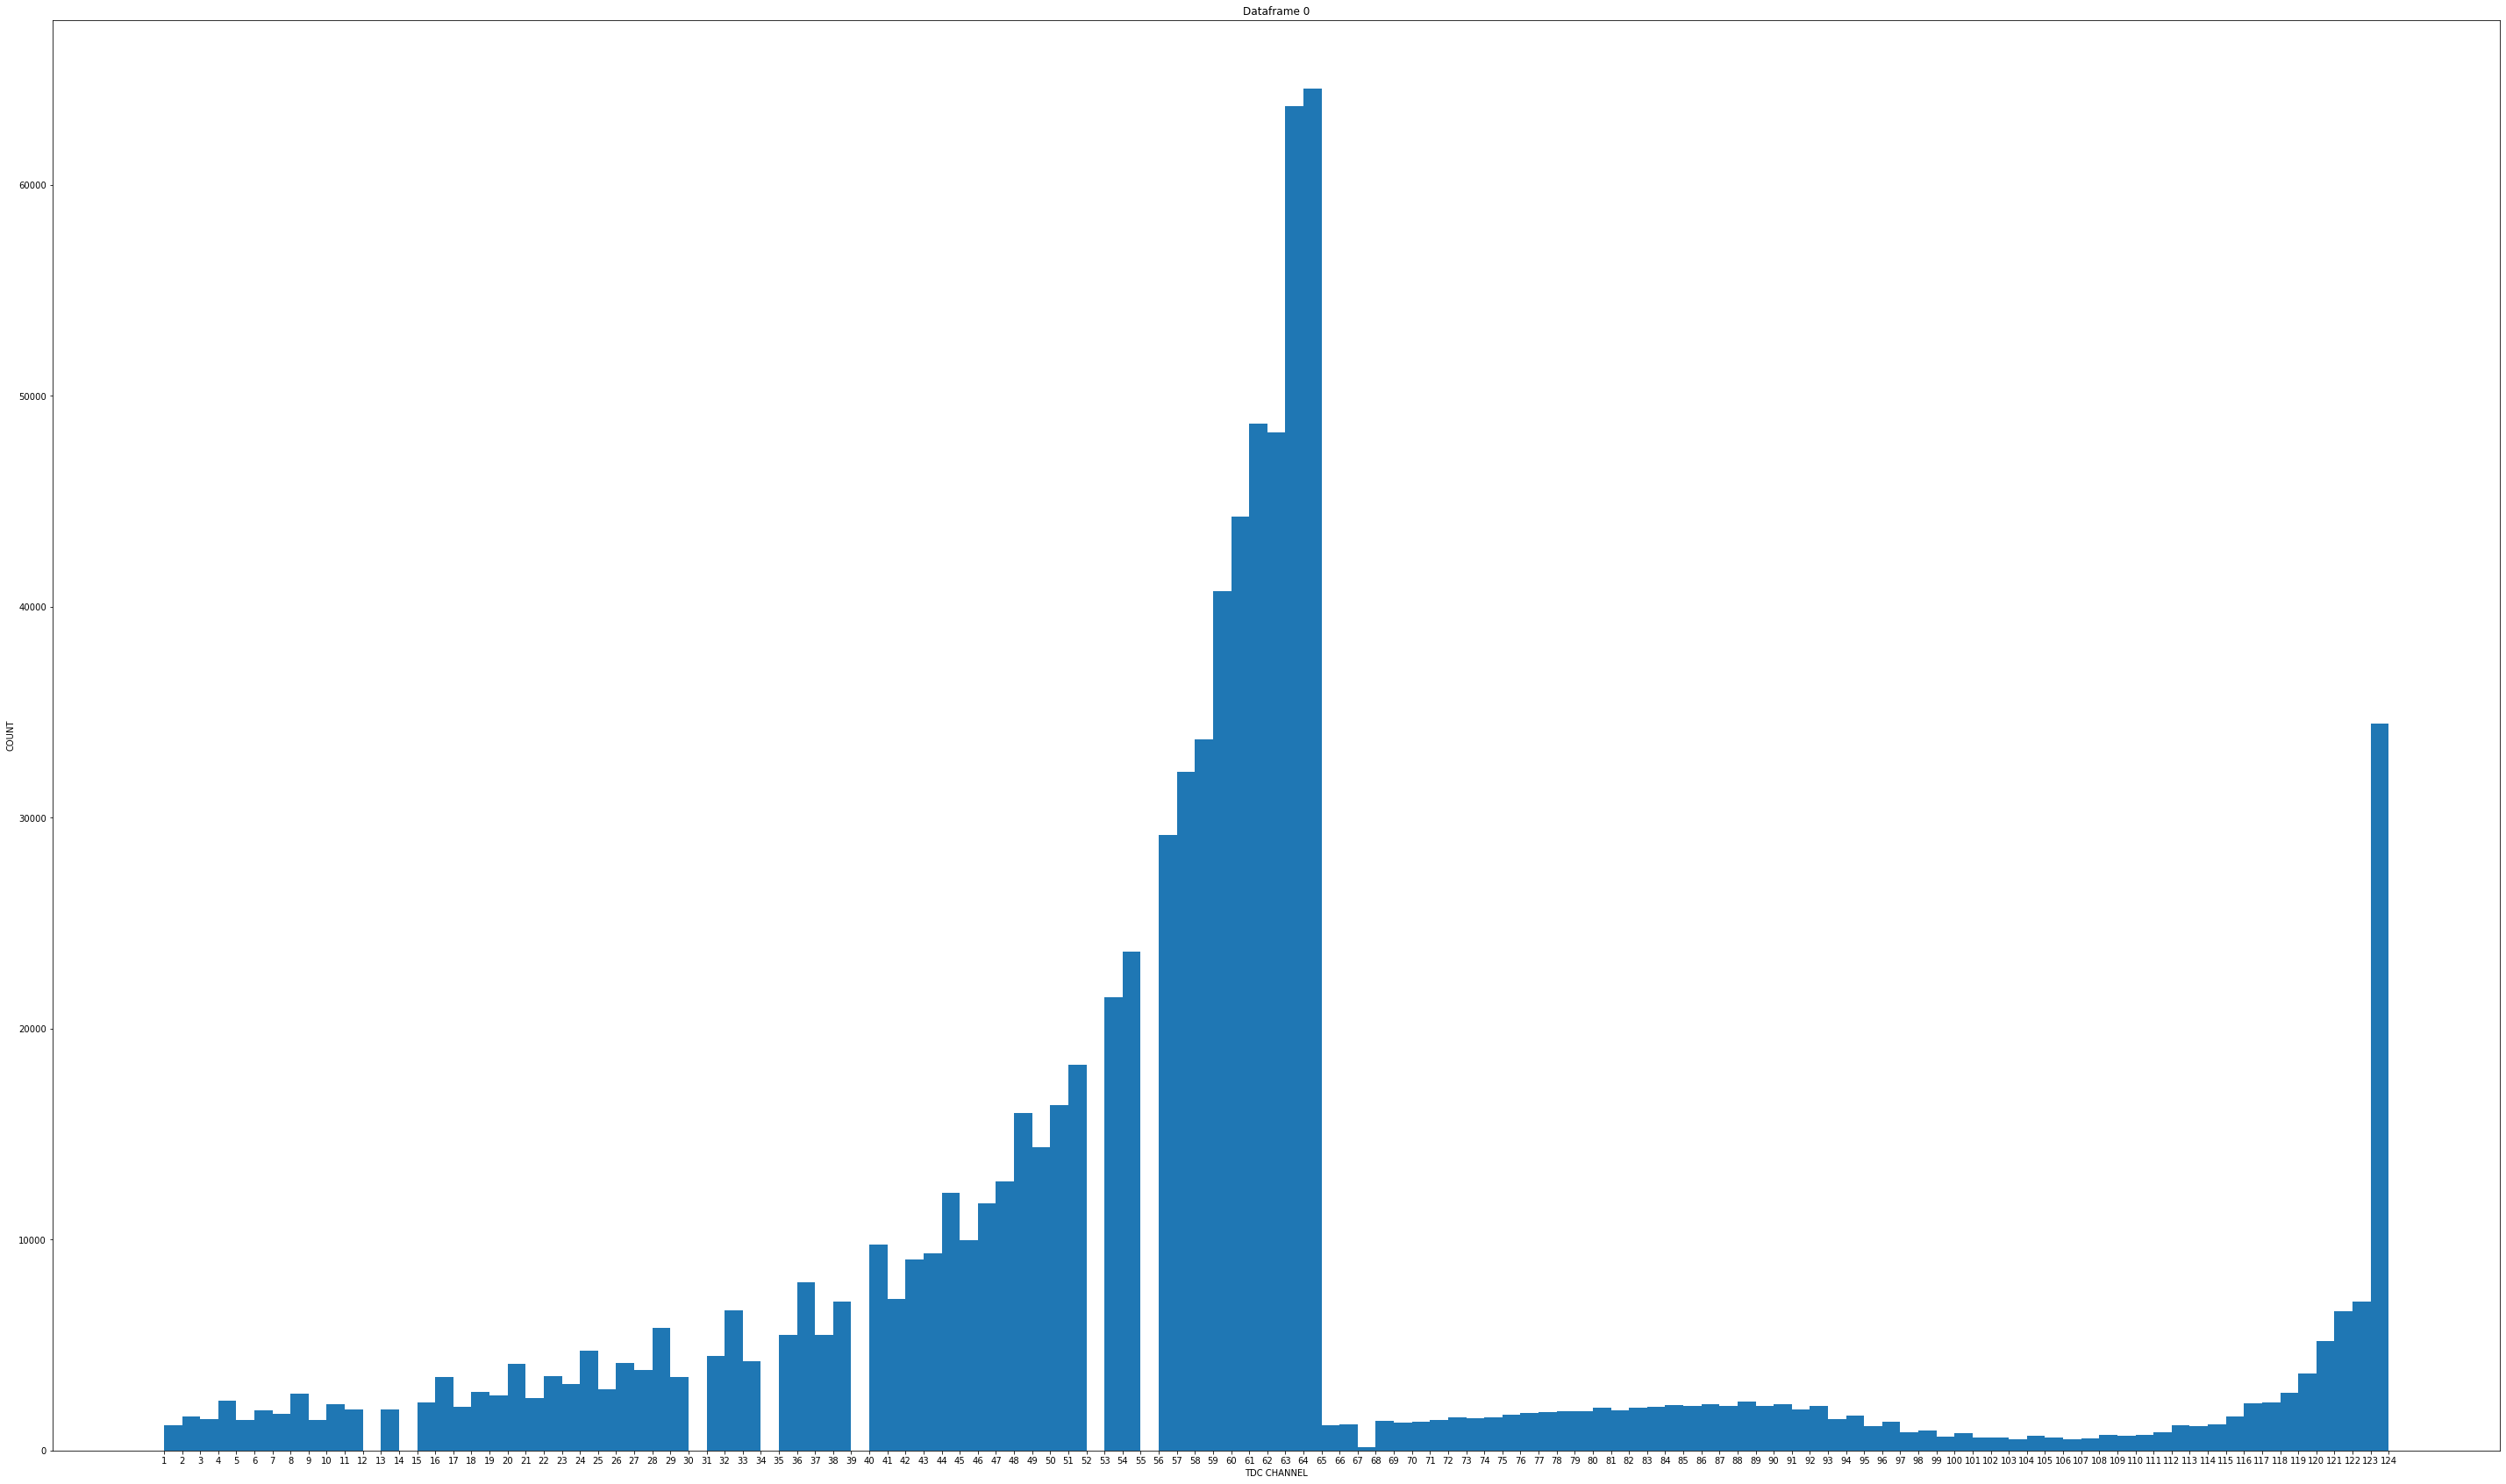

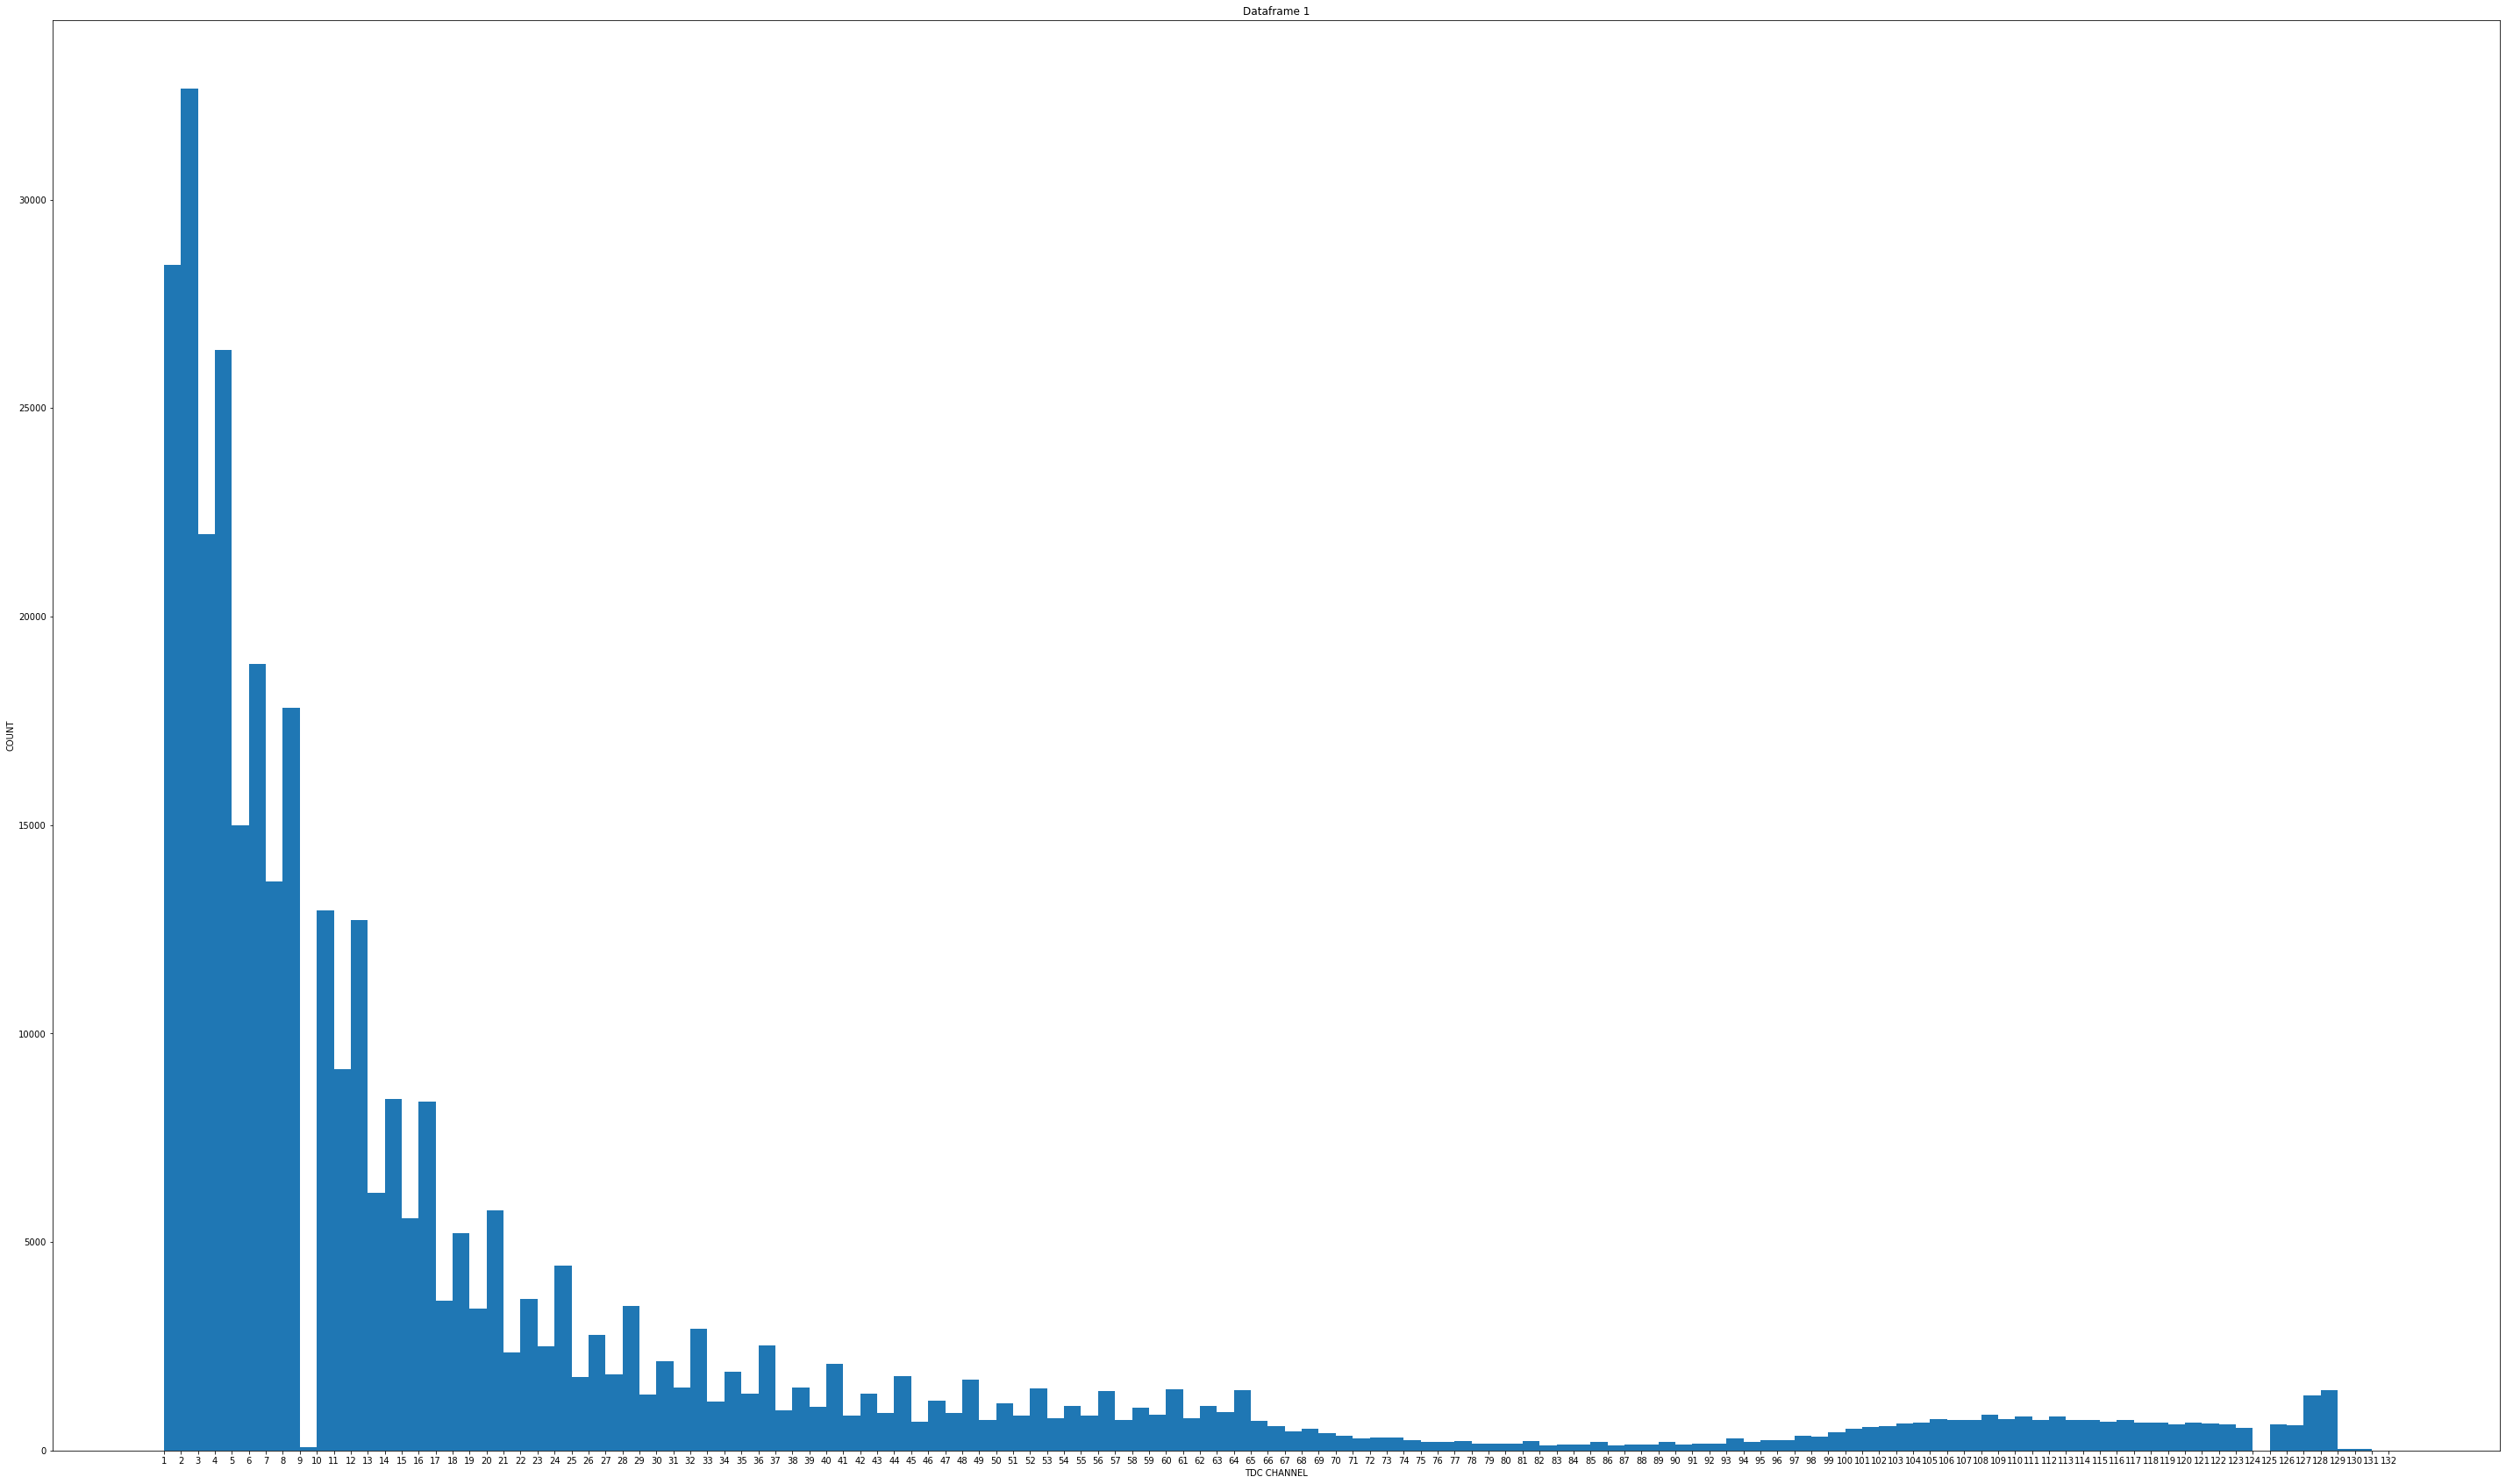

In [48]:
#since the data are already counted i can not use the bins to count the values inside the intervals.
#i set as x values the indexes of the dataframe, the bins are setted with a dimension of 1 and then i assigned
#a weights to each bins equal to the count extracted from the dataframe

i=0 #used to set the title of the plots

for data in fpga: #iterating over the dataframes in the list
    plt.figure(figsize=(50,30))
    plt.xlabel("TDC CHANNEL")
    plt.ylabel("COUNT")
    plt.xticks(range(1,len(data)+1))
    #plt.yticks(data["COUNT"].values) # => need a big size for a better visualization
    plt.title("Dataframe {}".format(i))
    plt.hist(data.index, bins = range(1,len(data)+1), weights = data["COUNT"].values) #explained before
    plt.show()
    i+=1